# **San Francisco Traffic Collision Severity Prediction**

# 1. Introduction and Objective

> The introduction and objective of this project are succinctly framed around harnessing advanced machine learning models to predict and analyze the severity of traffic collisions in San Francisco. It aims to contribute actionable insights towards achieving the Vision Zero goal of eliminating traffic fatalities and serious injuries by providing a data-driven approach to understanding and mitigating risk factors associated with road safety.





## 2. Data Understanding


> Data Understanding is done by following the CRISP-DM approach. We focus on the Collect Initial Data, Describe Data, Explore Data, Verify Data Quality.



> The dataset can be downloaded from the above link which is the Traffic crash resulting in injury public safety dataset from the San Francisco SFPD department and Public Health department. This is a public dataset which is provided on their website. The goal of this dataset is to support the City of San Francisco's Vision Zero initiative, which aims to eliminate all traffic fatalities and severe injuries by 2024.

> This dataset contains 55.3K rows and 55 columns. Each row in this dataset represents a collision.

> These are the columns in our dataset. The dataset is downloaded in the form of a csv file from the website. This dataset was suitable for our goal as it contains all the information to predict the severity of the traffic collision in San-Francisco city.








In [ ]:
import pandas as pd

df = pd.read_csv('Traffic_Dataset.csv')

# print the first 5 rows
print(df.head())


       collision_datetime  accident_year      month day_of_week    primary_rd  \
0        05-07-2013 16:35           2013        May     Tuesday     FULTON ST   
1  09/22/2013 01:15:00 AM           2013  September      Sunday  VAN NESS AVE   
2  01/24/2014 03:38:00 PM           2014    January      Friday     MARKET ST   
3  09/23/2017 10:02:00 PM           2017  September    Saturday     GREAT HWY   
4  10/19/2019 09:29:00 AM           2019    October    Saturday      06TH AVE   

  weather type_of_collision vehicle_involvement_type              ped_action  \
0  Cloudy           Head-On      Other Motor Vehicle  No Pedestrian Involved   
1   Clear          Rear End                  Bicycle  No Pedestrian Involved   
2   Clear         Broadside                  Bicycle  No Pedestrian Involved   
3   Clear        Overturned             Fixed Object  No Pedestrian Involved   
4   Clear        Hit Object             Fixed Object  No Pedestrian Involved   

  road_surface  ... party2_move_

In [ ]:
df

,collision_datetime,accident_year,month,day_of_week,primary_rd,weather,type_of_collision,vehicle_involvement_type,ped_action,road_surface,...,party2_move_pre_acc,District,time_cat_label,collision_severity_label,road_condition,Party_at_fault,Party_1_type,Party_2_type,Party_1_Direction,Party_2_Direction
0,05-07-2013 16:35,2013,May,Tuesday,FULTON ST,Cloudy,Head-On,Other Motor Vehicle,No Pedestrian Involved,Dry,...,Stopped In Road,District 3,afternoon,Minor Injury,Normal,Party 1,Driver,Driver,West,East
1,09/22/2013 01:15:00 AM,2013,September,Sunday,VAN NESS AVE,Clear,Rear End,Bicycle,No Pedestrian Involved,Dry,...,Stopped In Road,District 6,midnight,Minor Injury,Normal,Party 1,Driver,Bicycle,North,North
2,01/24/2014 03:38:00 PM,2014,January,Friday,MARKET ST,Clear,Broadside,Bicycle,No Pedestrian Involved,Dry,...,Not Stated,District 5,afternoon,Minor Injury,Normal,Not given,Bicycle,Driver,South,Not Stated
3,09/23/2017 10:02:00 PM,2017,September,Saturday,GREAT HWY,Clear,Overturned,Fixed Object,No Pedestrian Involved,Dry,...,NaN,District 9,midnight,Moderate Injury,Normal,Party 1,Driver,Not Stated,South,Not Stated
4,10/19/2019 09:29:00 AM,2019,October,Saturday,06TH AVE,Clear,Hit Object,Fixed Object,No Pedestrian Involved,Dry,...,NaN,District 3,morning,Minor Injury,Normal,Party 1,Driver,Not Stated,West,Not Stated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55148,09-01-2022 17:28,2022,September,Thursday,POTRERO AVE,Clear,Head-On,Other Motor Vehicle,No Pedestrian Involved,Dry,...,Proceeding Straight,District 5,afternoon,Minor Injury,Normal,Party 1,Driver,Driver,West,East
55149,12/28/2018 10:04:00 AM,2018,December,Friday,OFARRELL ST,Clear,Vehicle/Pedestrian,Pedestrian,Crossing in Crosswalk at Intersection,Dry,...,Proceeding Straight,District 2,midday,Minor Injury,Normal,Party 1,Driver,Pedestrian,North,Not Stated
55150,07/25/2013 12:50:00 AM,2013,July,Thursday,FOLSOM ST,Clear,Hit Object,Non-Collision,No Pedestrian Involved,Dry,...,NaN,District 5,midnight,Moderate Injury,Normal,Party 1,Bicycle,Not Stated,East,Not Stated
55151,12-01-2022 23:02,2022,December,Thursday,POLK ST,Clear,Broadside,Other Object,No Pedestrian Involved,Dry,...,Proceeding Straight,District 5,midnight,Moderate Injury,Normal,Party 1,Other,Driver,North,West


### Describe Data

> During a preliminary analysis of the data, it is evident that latitude, longitude, date time, weather, collision severity, lightning condition, road condition, number of people killed, number of people injured, type of collision. party at fault, party type, intersection. and direction of travel are all important attributes in our dataset. These attributes are likely to be valuable in making predictions. The dataset appears to have a low occurrence of missing values, which can be further assessed during the preparation phase. The quality of these attributes can contribute significantly to determining the collision severity. This dataset also contains columns which hold the same information as the mviw column which is the vehicle involvement type and crash part grouping they hold same information. The dataset encompasses a 17-year period from 2005 to 2022. With one visible outlier which has one record from the year 1987. The data has sufficient information and attributes to work on and to do the necessary prediction to determine the severity.


In [ ]:
df.info() # Verifying Datatypes of each attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55153 entries, 0 to 55152
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   collision_datetime        55145 non-null  object 
 1   accident_year             55153 non-null  int64  
 2   month                     55153 non-null  object 
 3   day_of_week               55147 non-null  object 
 4   primary_rd                55153 non-null  object 
 5   weather                   55153 non-null  object 
 6   type_of_collision         55153 non-null  object 
 7   vehicle_involvement_type  55153 non-null  object 
 8   ped_action                55153 non-null  object 
 9   road_surface              55153 non-null  object 
 10  lighting                  55153 non-null  object 
 11  intersection              55153 non-null  object 
 12  vz_pcf_description        55153 non-null  object 
 13  number_killed             55150 non-null  float64
 14  number



> **Checking each category/ Distribution**



In [ ]:
for col in df.columns:
    print('Column:', col)
    print(df[col].value_counts())
    print()

Column: collision_datetime
02/15/2010 06:50:00 PM    4
07/15/2019 08:00:00 AM    3
03-11-2022 07:54          3
08-11-2018 15:30          3
06-03-2018 15:32          3
                         ..
07/22/2019 10:50:00 AM    1
09/26/2016 05:15:00 PM    1
04-09-2014 16:31          1
04-08-2015 12:15          1
04-01-2013 16:30          1
Name: collision_datetime, Length: 54689, dtype: int64

Column: accident_year
2019    3468
2017    3424
2016    3296
2018    3294
2012    3267
2005    3254
2010    3095
2011    3093
2007    3062
2013    3055
2008    3038
2015    3023
2014    2946
2009    2895
2006    2894
2022    2874
2021    2741
2020    2433
1987       1
Name: accident_year, dtype: int64

Column: month
October      5244
September    4958
August       4695
March        4686
November     4521
May          4506
June         4491
December     4483
April        4430
July         4419
January      4364
February     4356
Name: month, dtype: int64

Column: day_of_week
Friday       8657
Wednesday  

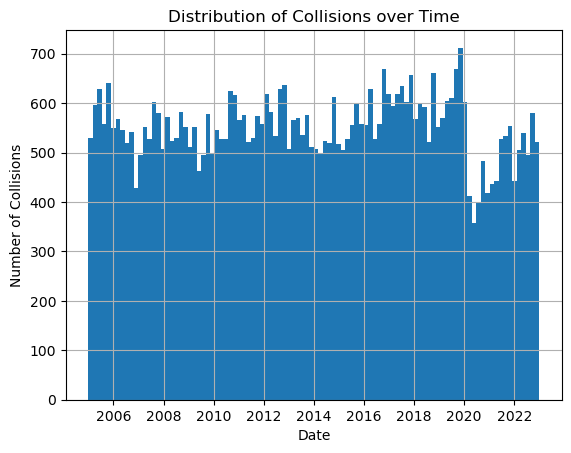

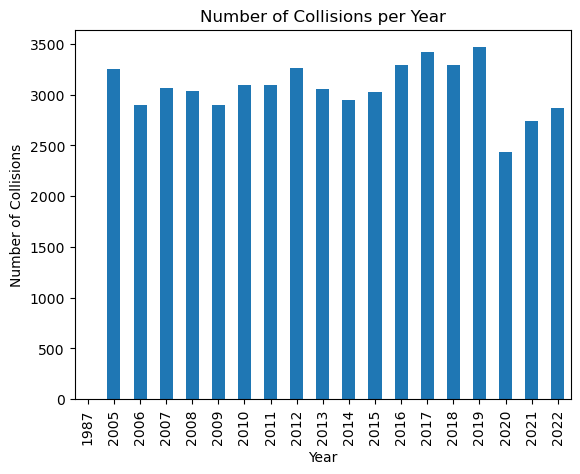

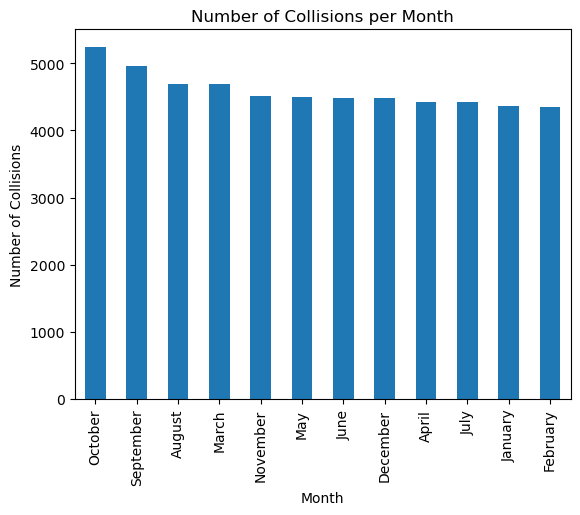

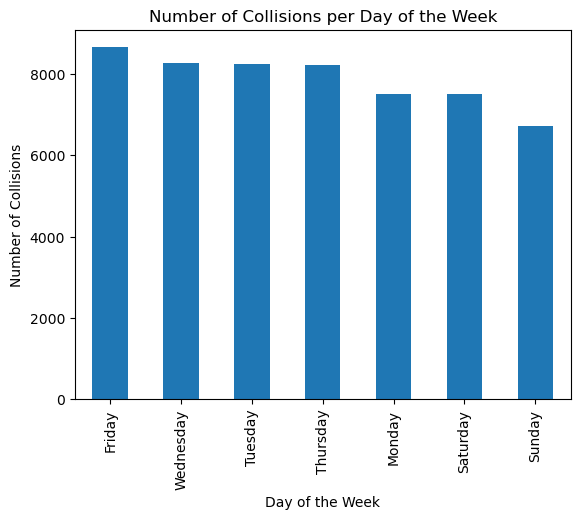

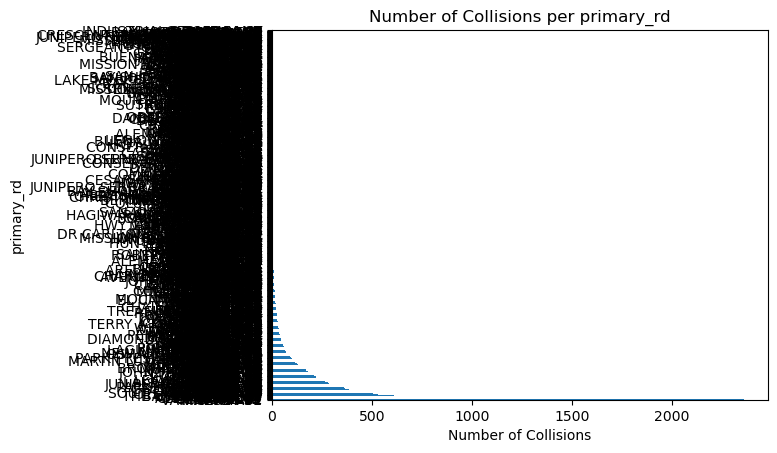

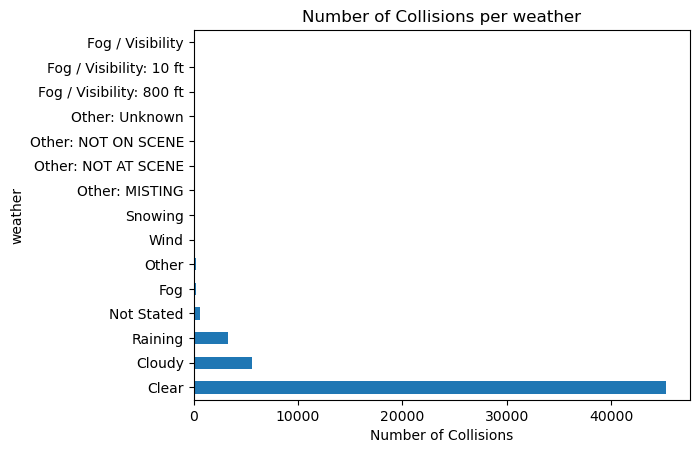

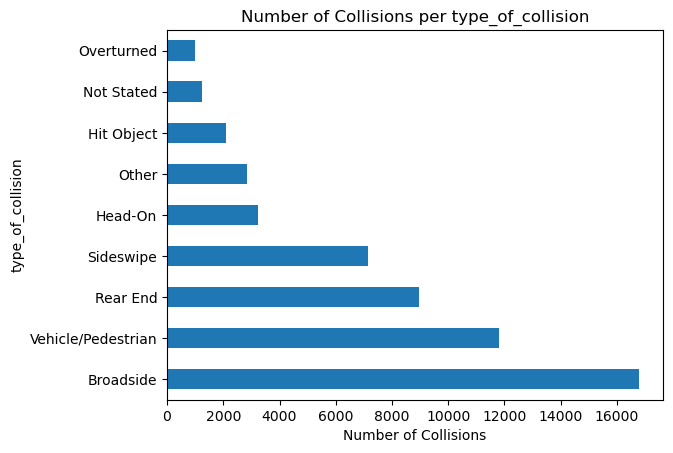

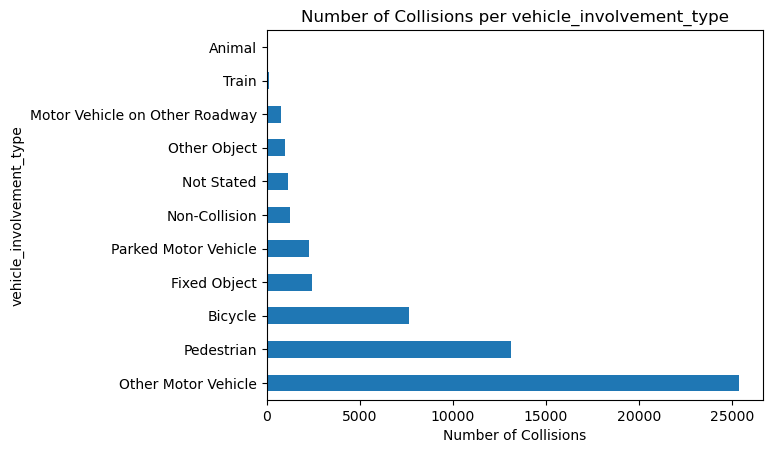

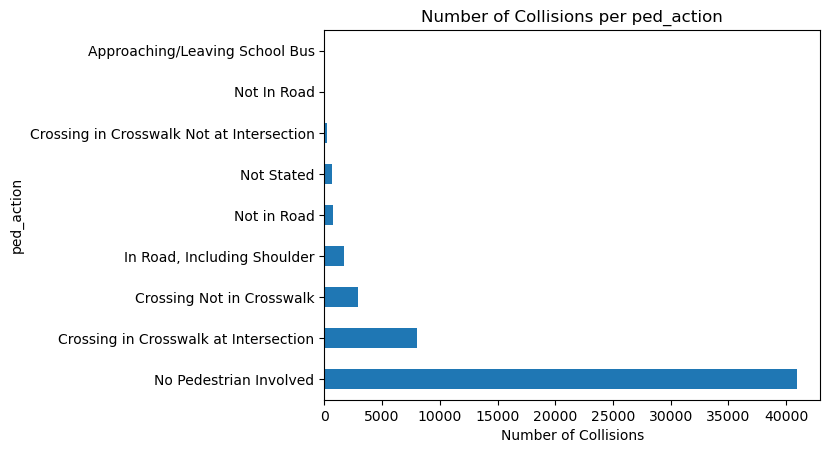

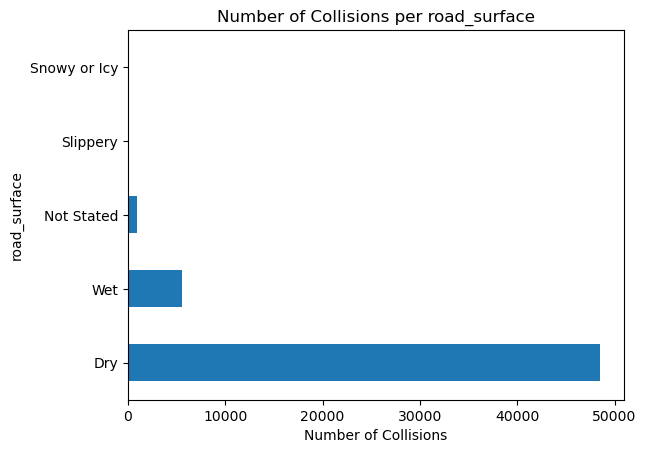

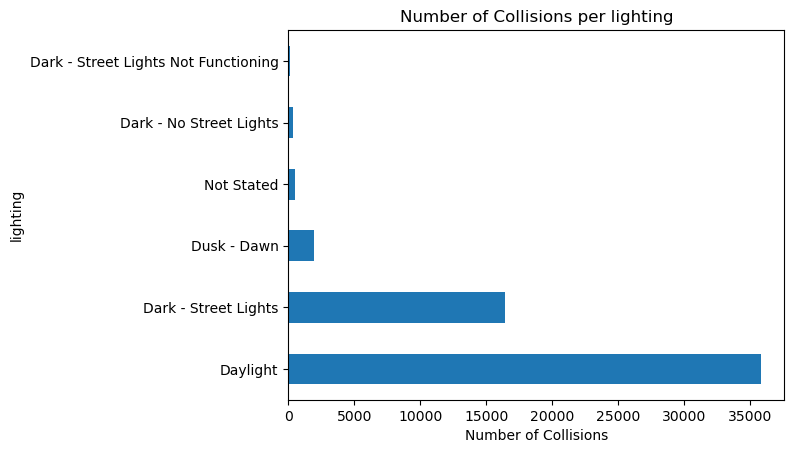

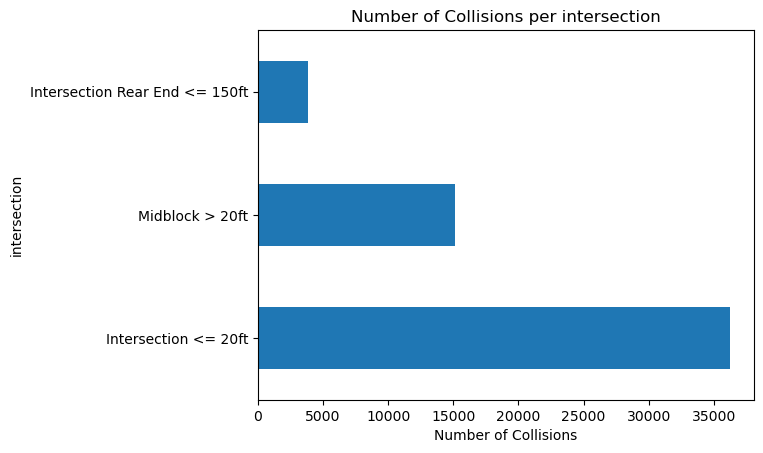

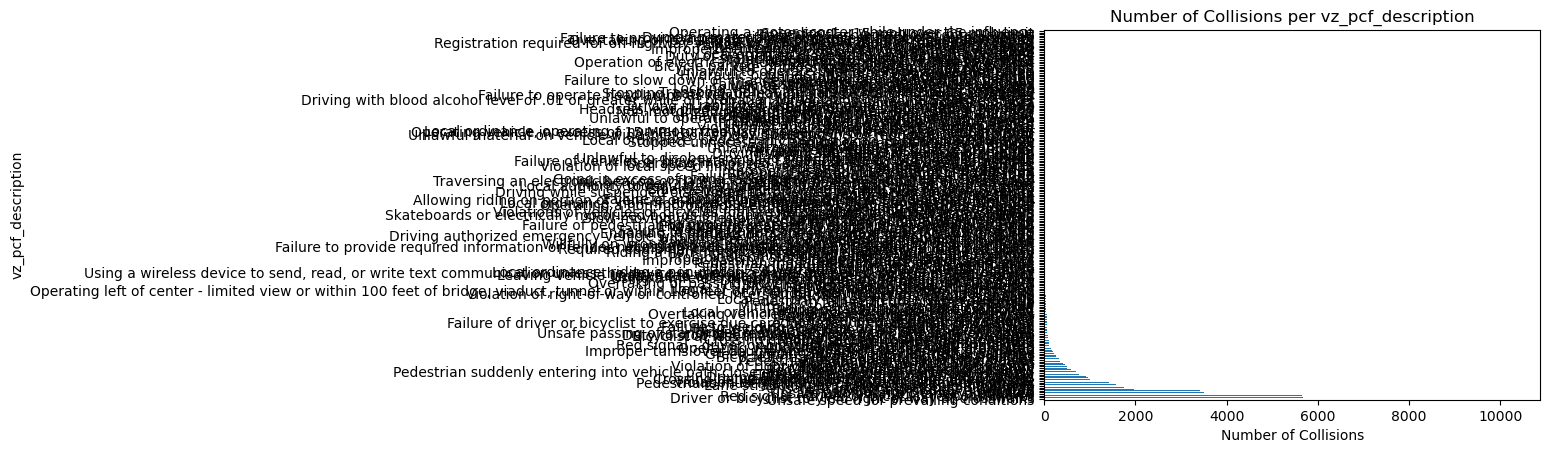

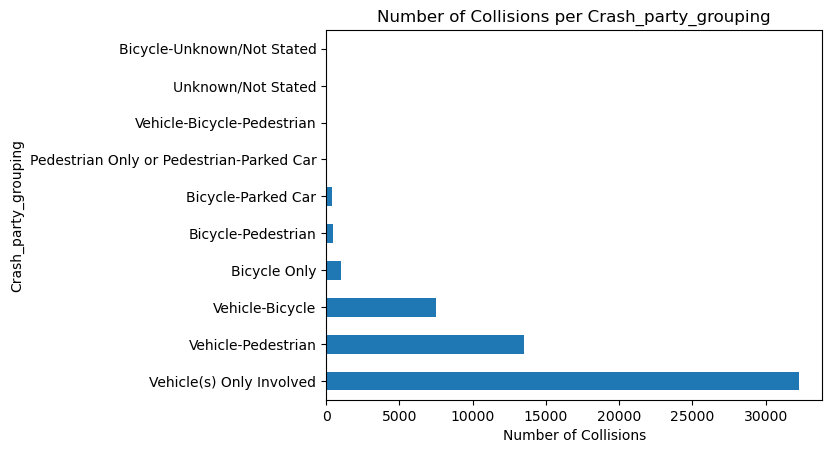

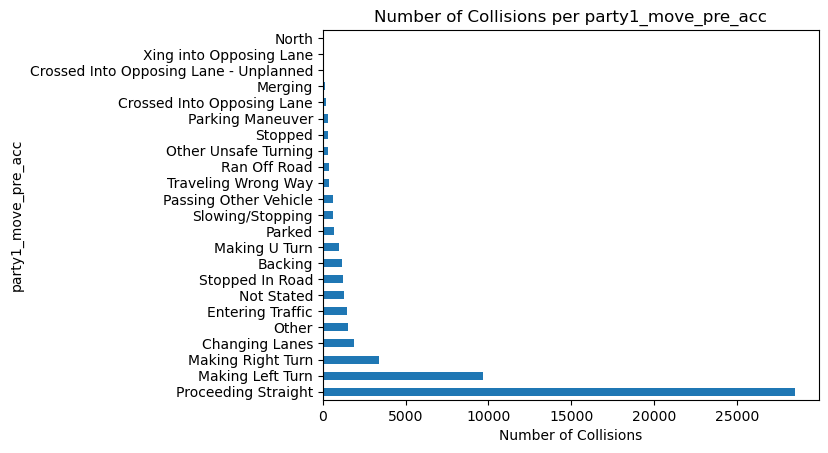

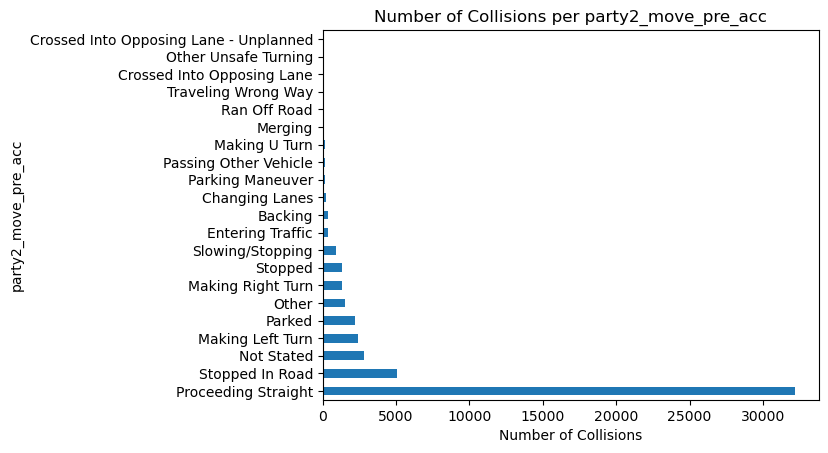

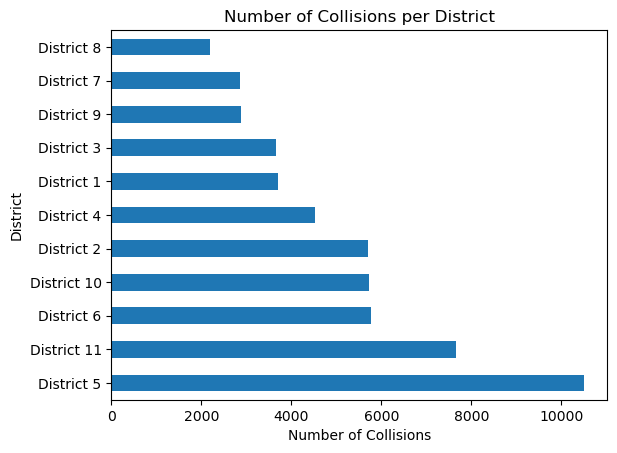

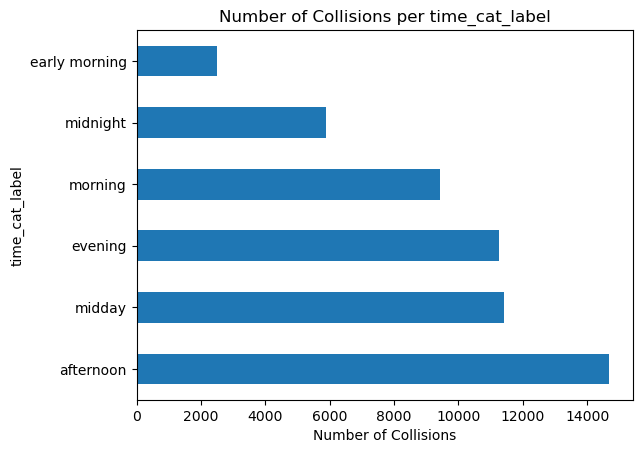

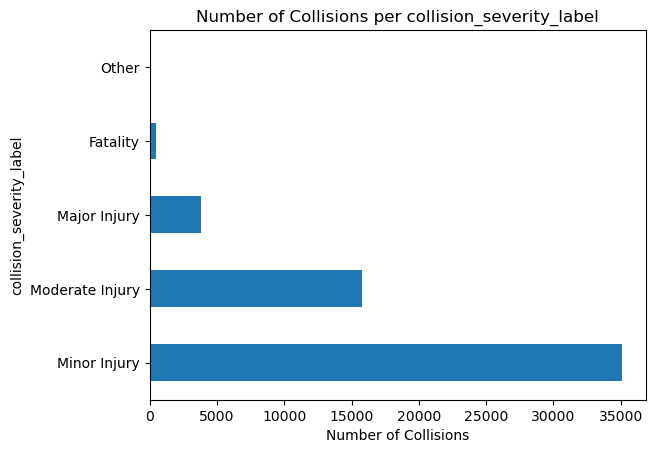

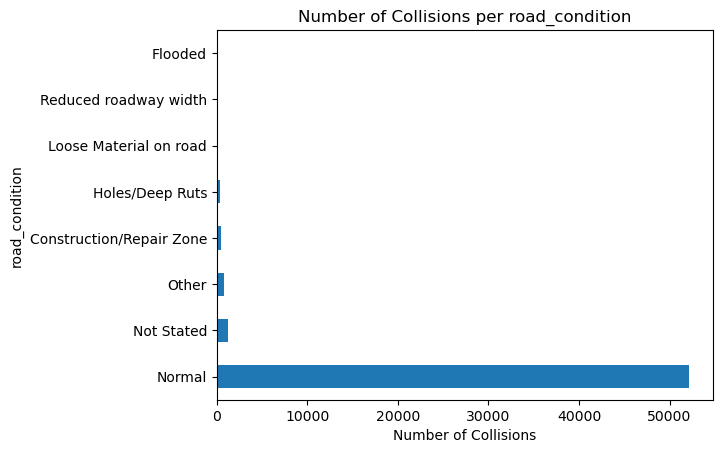

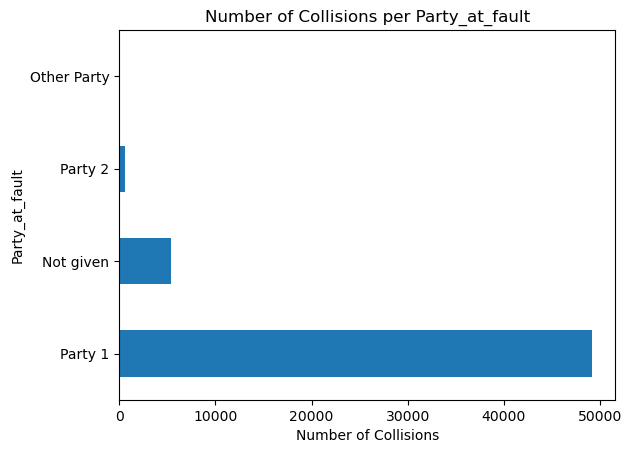

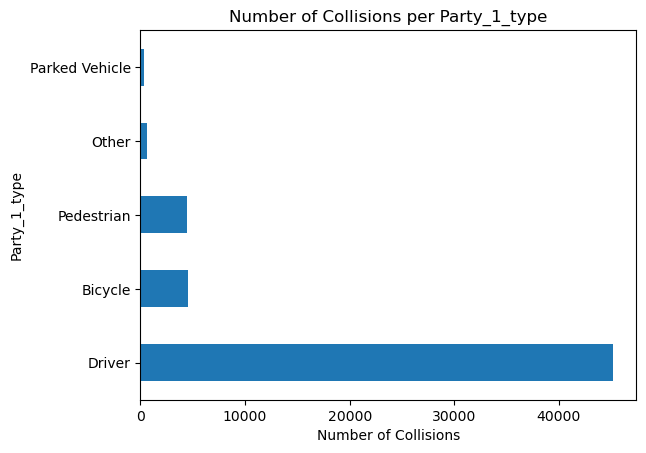

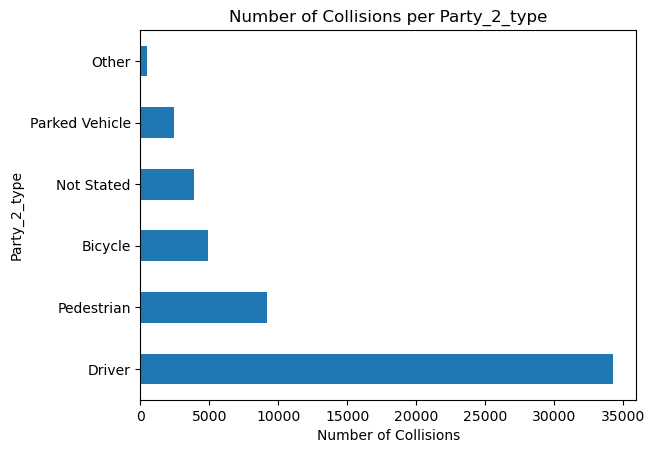

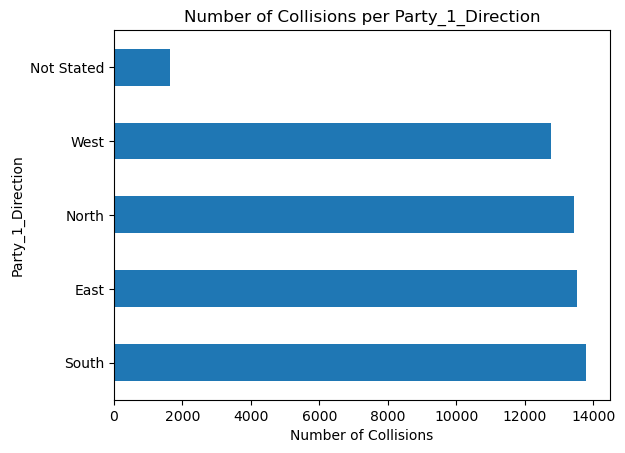

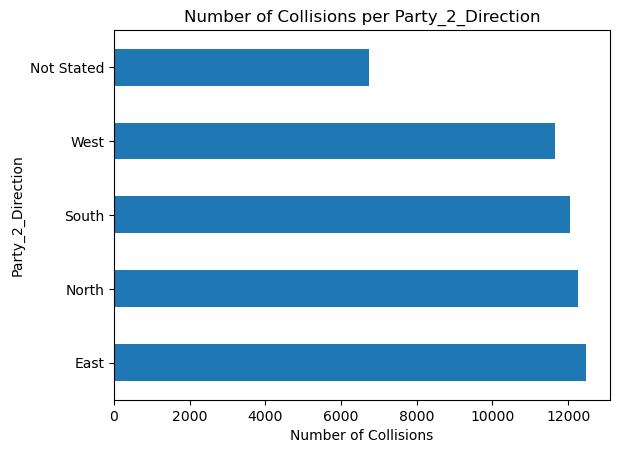

In [ ]:
import matplotlib.pyplot as plt

df['collision_datetime'] = pd.to_datetime(df['collision_datetime'])
df['collision_datetime'].hist(bins=100)
plt.xlabel('Date')
plt.ylabel('Number of Collisions')
plt.title('Distribution of Collisions over Time')
plt.show()

year_counts = df['accident_year'].value_counts()
year_counts.sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.title('Number of Collisions per Year')
plt.show()

month_counts = df['month'].value_counts()
month_counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.title('Number of Collisions per Month')
plt.show()

day_counts = df['day_of_week'].value_counts()
day_counts.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Collisions')
plt.title('Number of Collisions per Day of the Week')
plt.show()

cols_to_plot = ['primary_rd', 'weather', 'type_of_collision', 'vehicle_involvement_type', 'ped_action', 'road_surface', 'lighting', 'intersection', 'vz_pcf_description', 'Crash_party_grouping', 'party1_move_pre_acc', 'party2_move_pre_acc', 'District', 'time_cat_label', 'collision_severity_label', 'road_condition', 'Party_at_fault', 'Party_1_type', 'Party_2_type', 'Party_1_Direction', 'Party_2_Direction']
for col in cols_to_plot:
    col_counts = df[col].value_counts()
    col_counts.plot(kind='barh')
    plt.xlabel('Number of Collisions')
    plt.ylabel(col)
    plt.title('Number of Collisions per ' + col)
    plt.show()


## 3. Data Preparation

> The data preparation phase for our San Francisco Traffic Collision Severity Prediction project was comprehensive, ensuring the dataset was optimized for our machine learning models. We began by removing duplicates and unwanted columns to streamline the dataset.






---


 ***Find missing values in the dataset***

---



In [ ]:
# Find missing values in the dataset
missing_values = df.isnull().sum()
print("Number of missing values:\n", missing_values)

Number of missing values:
 collision_datetime             8
accident_year                  0
month                          0
day_of_week                    6
primary_rd                     0
weather                        0
type_of_collision              0
vehicle_involvement_type       0
ped_action                     0
road_surface                   0
lighting                       0
intersection                   0
vz_pcf_description             0
number_killed                  3
number_injured                 0
Crash_party_grouping           0
party1_move_pre_acc            7
party2_move_pre_acc         3885
District                       0
time_cat_label                 0
collision_severity_label       0
road_condition                 0
Party_at_fault                 0
Party_1_type                  35
Party_2_type                   0
Party_1_Direction              7
Party_2_Direction              0
dtype: int64


In [ ]:
print(df.shape) # Dataset Shape

(55153, 27)


In [ ]:
print(df.dtypes) # Verifying Datatypes

collision_datetime          datetime64[ns]
accident_year                        int64
month                               object
day_of_week                         object
primary_rd                          object
weather                             object
type_of_collision                   object
vehicle_involvement_type            object
ped_action                          object
road_surface                        object
lighting                            object
intersection                        object
vz_pcf_description                  object
number_killed                      float64
number_injured                       int64
Crash_party_grouping                object
party1_move_pre_acc                 object
party2_move_pre_acc                 object
District                            object
time_cat_label                      object
collision_severity_label            object
road_condition                      object
Party_at_fault                      object
Party_1_typ

### Checking Mean, Std

In [ ]:
print(df.describe())


       accident_year  number_killed  number_injured
count   55153.000000   55150.000000     55153.00000
mean     2013.443911       0.009574         1.25888
std         5.127446       0.099587         0.70420
min      1987.000000       0.000000         0.00000
25%      2009.000000       0.000000         1.00000
50%      2013.000000       0.000000         1.00000
75%      2018.000000       0.000000         1.00000
max      2022.000000       3.000000        19.00000


### Checking Null Values

In [ ]:
print(df.isnull().sum())

collision_datetime             8
accident_year                  0
month                          0
day_of_week                    6
primary_rd                     0
weather                        0
type_of_collision              0
vehicle_involvement_type       0
ped_action                     0
road_surface                   0
lighting                       0
intersection                   0
vz_pcf_description             0
number_killed                  3
number_injured                 0
Crash_party_grouping           0
party1_move_pre_acc            7
party2_move_pre_acc         3885
District                       0
time_cat_label                 0
collision_severity_label       0
road_condition                 0
Party_at_fault                 0
Party_1_type                  35
Party_2_type                   0
Party_1_Direction              7
Party_2_Direction              0
dtype: int64


### Changing months attribute into 4 different seasons

In [ ]:
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Fall'
    else:
        return 'Unknown'


# Apply function to "month" column and create new "season" column
df['season'] = df['month'].map(get_season)



In [ ]:
df['season'].value_counts()

Fall      14723
Spring    13622
Summer    13605
Winter    13203
Name: season, dtype: int64

###  collision_datetime to DATE and TIME

In [ ]:
df["collision_datetime"] = pd.to_datetime(df["collision_datetime"])

# Extract date and time components into separate columns
df["collision_date"] = df["collision_datetime"].dt.date
df["collision_time"] = df["collision_datetime"].dt.time

### Drop the "collision_datetime" column and "month"

In [ ]:
df.drop('month', axis=1, inplace=True)
df = df.drop("collision_datetime", axis=1)

In [ ]:
df.head(5)

,accident_year,day_of_week,primary_rd,weather,type_of_collision,vehicle_involvement_type,ped_action,road_surface,lighting,intersection,...,collision_severity_label,road_condition,Party_at_fault,Party_1_type,Party_2_type,Party_1_Direction,Party_2_Direction,season,collision_date,collision_time
0,2013,Tuesday,FULTON ST,Cloudy,Head-On,Other Motor Vehicle,No Pedestrian Involved,Dry,Daylight,Midblock > 20ft,...,Minor Injury,Normal,Party 1,Driver,Driver,West,East,Spring,2013-05-07,16:35:00
1,2013,Sunday,VAN NESS AVE,Clear,Rear End,Bicycle,No Pedestrian Involved,Dry,Dark - Street Lights,Intersection <= 20ft,...,Minor Injury,Normal,Party 1,Driver,Bicycle,North,North,Fall,2013-09-22,01:15:00
2,2014,Friday,MARKET ST,Clear,Broadside,Bicycle,No Pedestrian Involved,Dry,Daylight,Intersection <= 20ft,...,Minor Injury,Normal,Not given,Bicycle,Driver,South,Not Stated,Winter,2014-01-24,15:38:00
3,2017,Saturday,GREAT HWY,Clear,Overturned,Fixed Object,No Pedestrian Involved,Dry,Not Stated,Midblock > 20ft,...,Moderate Injury,Normal,Party 1,Driver,Not Stated,South,Not Stated,Fall,2017-09-23,22:02:00
4,2019,Saturday,06TH AVE,Clear,Hit Object,Fixed Object,No Pedestrian Involved,Dry,Daylight,Midblock > 20ft,...,Minor Injury,Normal,Party 1,Driver,Not Stated,West,Not Stated,Fall,2019-10-19,09:29:00


**The time_cat column was renamed to more intuitive time categories such as 'afternoon', 'midnight', 'early morning', 'morning', 'evening', and 'midday'.**

---


#### 00:00 to 02:00 - midnight
#### after 02:00 to before 06:00 - early morning
#### from 06:00 to till 10:00 - morning
#### after 10:00 to till 14:00 - midday
#### after 14:00 to till 18:00 - afternoon
#### after 18:00 to 22:00 - evening
#### after 22:00 to 00:00 - midnight

---



**Removing the Unnecessary College**

---


#### Removed the primary_rd column
#### Then we removed the vehicle involvement column
#### Then we removed party1_move_pre_acc, party2_move_pre_acc
#### We have daily vice category so we removed collision_date, collision_time

---



In [ ]:
df = df.drop(['primary_rd', 'vehicle_involvement_type', 'party1_move_pre_acc', 'party2_move_pre_acc', 'collision_date', 'collision_time'], axis=1)

In [ ]:
# df.to_csv('step2.csv', index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55153 entries, 0 to 55152
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   accident_year             55153 non-null  int64  
 1   day_of_week               55147 non-null  object 
 2   weather                   55153 non-null  object 
 3   type_of_collision         55153 non-null  object 
 4   ped_action                55153 non-null  object 
 5   road_surface              55153 non-null  object 
 6   lighting                  55153 non-null  object 
 7   intersection              55153 non-null  object 
 8   vz_pcf_description        55153 non-null  object 
 9   number_killed             55150 non-null  float64
 10  number_injured            55153 non-null  int64  
 11  Crash_party_grouping      55153 non-null  object 
 12  District                  55153 non-null  object 
 13  time_cat_label            55153 non-null  object 
 14  collis

#### Here we deleted the missing value records from the  'day_of_week ' column even though one of them is Fatality in target column, so many other columns are also 'Not stated'

In [ ]:
df.dropna(subset=['day_of_week'], inplace=True)


#### Here we deleted the missing value records from the 'number_killed' column because they had only minor injury

In [ ]:
df.dropna(subset=['number_killed'], inplace=True)

In [ ]:
# df.to_csv('step2.csv', index=False)

#### Here we replaced the missing value records with 'Not Stated' to the 'Party_1_type' and 'Party_1_Direction' because Fatality and moderate injury s are involued

In [ ]:
# Replace missing values in Party_1_type and Party_1_Direction columns with 'Not Stated'
df['Party_1_type'] = df['Party_1_type'].fillna('Not Stated')
df['Party_1_Direction'] = df['Party_1_Direction'].fillna('Not Stated')


In [ ]:
missing_values = df.isnull().sum()
print("Number of missing values:\n", missing_values)

Number of missing values:
 accident_year               0
day_of_week                 0
weather                     0
type_of_collision           0
ped_action                  0
road_surface                0
lighting                    0
intersection                0
vz_pcf_description          0
number_killed               0
number_injured              0
Crash_party_grouping        0
District                    0
time_cat_label              0
collision_severity_label    0
road_condition              0
Party_at_fault              0
Party_1_type                0
Party_2_type                0
Party_1_Direction           0
Party_2_Direction           0
season                      0
dtype: int64


In [ ]:
df['number_killed'] = df['number_killed'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55144 entries, 0 to 55152
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   accident_year             55144 non-null  int64 
 1   day_of_week               55144 non-null  object
 2   weather                   55144 non-null  object
 3   type_of_collision         55144 non-null  object
 4   ped_action                55144 non-null  object
 5   road_surface              55144 non-null  object
 6   lighting                  55144 non-null  object
 7   intersection              55144 non-null  object
 8   vz_pcf_description        55144 non-null  object
 9   number_killed             55144 non-null  int32 
 10  number_injured            55144 non-null  int64 
 11  Crash_party_grouping      55144 non-null  object
 12  District                  55144 non-null  object
 13  time_cat_label            55144 non-null  object
 14  collision_severity_lab

In [ ]:
for col in df.columns:
    print('Column:', col)
    print(df[col].value_counts())
    print()

Column: accident_year
2019    3468
2017    3424
2016    3296
2018    3294
2012    3267
2005    3254
2010    3095
2011    3093
2007    3062
2013    3055
2008    3038
2015    3022
2014    2944
2009    2895
2006    2894
2022    2874
2021    2735
2020    2433
1987       1
Name: accident_year, dtype: int64

Column: day_of_week
Friday       8657
Wednesday    8280
Tuesday      8248
Thursday     8224
Monday       7505
Saturday     7499
Sunday       6731
Name: day_of_week, dtype: int64

Column: weather
Clear                       45248
Cloudy                       5561
Raining                      3247
Not Stated                    584
Fog                           241
Other                         207
Wind                           47
Snowing                         2
Other: MISTING                  1
Other: NOT AT SCENE             1
Other: NOT ON SCENE             1
Other: Unknown                  1
Fog / Visibility: 800 ft        1
Fog / Visibility: 10 ft         1
Fog / Visibility         

In [ ]:
pd.options.display.max_rows = None

# Display value counts for 'vz_pcf_description'
print(df['vz_pcf_description'].value_counts())

Unsafe speed for prevailing conditions                                                                                                                   10355
Driver or bicyclist to yield right-of-way at crosswalks                                                                                                   5683
Red signal - driver or bicyclist responsibilities                                                                                                         5658
Unknown                                                                                                                                                   4043
Unsafe turn or lane change prohibited                                                                                                                     3503
Violation of right-of-way - left turn                                                                                                                     3421
Following too closely prohibited              

####  It was too hard to categories this column, so we deleted the 'vz_pcf_description' column

In [ ]:
df = df.drop("vz_pcf_description", axis=1)

In [ ]:
df.head(5)

,accident_year,day_of_week,weather,type_of_collision,ped_action,road_surface,lighting,intersection,number_killed,number_injured,...,District,time_cat_label,collision_severity_label,road_condition,Party_at_fault,Party_1_type,Party_2_type,Party_1_Direction,Party_2_Direction,season
0,2013,Tuesday,Cloudy,Head-On,No Pedestrian Involved,Dry,Daylight,Midblock > 20ft,0,1,...,District 3,afternoon,Minor Injury,Normal,Party 1,Driver,Driver,West,East,Spring
1,2013,Sunday,Clear,Rear End,No Pedestrian Involved,Dry,Dark - Street Lights,Intersection <= 20ft,0,1,...,District 6,midnight,Minor Injury,Normal,Party 1,Driver,Bicycle,North,North,Fall
2,2014,Friday,Clear,Broadside,No Pedestrian Involved,Dry,Daylight,Intersection <= 20ft,0,1,...,District 5,afternoon,Minor Injury,Normal,Not given,Bicycle,Driver,South,Not Stated,Winter
3,2017,Saturday,Clear,Overturned,No Pedestrian Involved,Dry,Not Stated,Midblock > 20ft,0,1,...,District 9,midnight,Moderate Injury,Normal,Party 1,Driver,Not Stated,South,Not Stated,Fall
4,2019,Saturday,Clear,Hit Object,No Pedestrian Involved,Dry,Daylight,Midblock > 20ft,0,1,...,District 3,morning,Minor Injury,Normal,Party 1,Driver,Not Stated,West,Not Stated,Fall


#### In weather column, we categorized other into one group and all the Fog related into one group.

> Clear, Cloudy, Raining, Fog, Wind, snowing, and other categories.





In [ ]:
# create a dictionary for categorizing the values
weather_dict = {
    'Not Stated': 'Other',
    'Other': 'Other',
    'Other: MISTING': 'Other',
    'Other: NOT AT SCENE': 'Other',
    'Other: NOT ON SCENE': 'Other',
    'Other: Unknown': 'Other',
    'Fog': 'Fog',
    'Fog / Visibility: 800 ft': 'Fog',
    'Fog / Visibility: 10 ft': 'Fog',
    'Fog / Visibility': 'Fog'
}

# use the dictionary to map the values to their categories
df['weather'] = df['weather'].map(weather_dict).fillna(df['weather'])

# print the value counts to check the categorization
print(df['weather'].value_counts())

Clear      45248
Cloudy      5561
Raining     3247
Other        795
Fog          244
Wind          47
Snowing        2
Name: weather, dtype: int64


In [ ]:
df.head(5)

,accident_year,day_of_week,weather,type_of_collision,ped_action,road_surface,lighting,intersection,number_killed,number_injured,...,District,time_cat_label,collision_severity_label,road_condition,Party_at_fault,Party_1_type,Party_2_type,Party_1_Direction,Party_2_Direction,season
0,2013,Tuesday,Cloudy,Head-On,No Pedestrian Involved,Dry,Daylight,Midblock > 20ft,0,1,...,District 3,afternoon,Minor Injury,Normal,Party 1,Driver,Driver,West,East,Spring
1,2013,Sunday,Clear,Rear End,No Pedestrian Involved,Dry,Dark - Street Lights,Intersection <= 20ft,0,1,...,District 6,midnight,Minor Injury,Normal,Party 1,Driver,Bicycle,North,North,Fall
2,2014,Friday,Clear,Broadside,No Pedestrian Involved,Dry,Daylight,Intersection <= 20ft,0,1,...,District 5,afternoon,Minor Injury,Normal,Not given,Bicycle,Driver,South,Not Stated,Winter
3,2017,Saturday,Clear,Overturned,No Pedestrian Involved,Dry,Not Stated,Midblock > 20ft,0,1,...,District 9,midnight,Moderate Injury,Normal,Party 1,Driver,Not Stated,South,Not Stated,Fall
4,2019,Saturday,Clear,Hit Object,No Pedestrian Involved,Dry,Daylight,Midblock > 20ft,0,1,...,District 3,morning,Minor Injury,Normal,Party 1,Driver,Not Stated,West,Not Stated,Fall


#### Here we grouped  'Other' and 'Not Stated' into Other/Not Stated group

In [ ]:
def categorize_collision_type(collision_type):
    if collision_type in ['Broadside', 'Vehicle/Pedestrian', 'Rear End', 'Sideswipe', 'Head-On']:
        return collision_type
    elif collision_type in ['Other', 'Not Stated']:
        return 'Other/Not Stated'
    else:
        return collision_type

df['collision_category'] = df['type_of_collision'].apply(categorize_collision_type)


####  Here we grouped 'Not in Road' and 'Not in Road ' into one 'Not in Road '

In [ ]:
df['ped_action'] = df['ped_action'].replace({
    'Not in Road': 'Not in road',
    'Not In Road': 'Not in road'
})
print(df['ped_action'].value_counts())

No Pedestrian Involved                       40902
Crossing in Crosswalk at Intersection         8056
Crossing Not in Crosswalk                     2904
In Road, Including Shoulder                   1708
Not in road                                    725
Not Stated                                     641
Crossing in Crosswalk Not at Intersection      197
Approaching/Leaving School Bus                  11
Name: ped_action, dtype: int64


#### Here we grouped 'Dark - No Street Lights', 'Dark - Street Lights Not Functioning' into 'Dark - No Street Lights/Not Functioning'

In [ ]:
# create a dictionary to map the values
lighting_mapping = {
    'Daylight': 'Daylight',
    'Dark - Street Lights': 'Dark - Street Lights',
    'Dusk - Dawn': 'Dusk - Dawn',
    'Not Stated': 'Not Stated',
    'Dark - No Street Lights': 'Dark - No Street Lights/Not Functioning',
    'Dark - Street Lights Not Functioning': 'Dark - No Street Lights/Not Functioning'
}

# use the map() function to apply the mapping to the column
df['lighting_categorized'] = df['lighting'].map(lighting_mapping)
df = df.drop(['lighting'], axis=1)
# check the value counts for the new column
print(df['lighting_categorized'].value_counts())


Daylight                                   35789
Dark - Street Lights                       16416
Dusk - Dawn                                 1916
Not Stated                                   534
Dark - No Street Lights/Not Functioning      489
Name: lighting_categorized, dtype: int64


####  Create five categories based on the number of injured people:

#### 0: for zero injuries
####  1: for one injury
####  2: for two injuries
####  3: for three injuries
####  4+: for four or more injuries.

In [ ]:
df['number_injured'] = pd.cut(df['number_injured'], bins=[-1, 0, 1, 2, 3, float("inf")], labels=["0", "1", "2", "3", "4+"])
print(df['number_injured'].value_counts())

1     44631
2      7109
3      1888
4+     1067
0       449
Name: number_injured, dtype: int64


#### In 'type_of_collision' column we grouped 'Other' and 'Not Stated' into 'Other/Not Stated'

In [ ]:
# Create a dictionary to map the old values to new categories
collision_dict = {
    'Broadside': 'Broadside',
    'Vehicle/Pedestrian': 'Vehicle/Pedestrian',
    'Rear End': 'Rear End',
    'Sideswipe': 'Sideswipe',
    'Head-On': 'Head-On',
    'Other': 'Other/Not Stated',
    'Not Stated': 'Other/Not Stated',
    'Hit Object': 'Hit Object',
    'Overturned': 'Overturned'
}

# Use the dictionary to replace the old values with the new categories
df['type_of_collision'] = df['type_of_collision'].replace(collision_dict)

print(df['type_of_collision'].value_counts())

Broadside             16798
Vehicle/Pedestrian    11801
Rear End               8975
Sideswipe              7141
Other/Not Stated       4108
Head-On                3247
Hit Object             2086
Overturned              988
Name: type_of_collision, dtype: int64


####  Replaces the values "Not Stated" and "Other" with the category "Not Stated/Other" in the Party_1_type column.

In [ ]:
df['Party_1_type'] = df['Party_1_type'].replace({'Other': 'Not Stated/Other',
                                                 'Not Stated': 'Not Stated/Other'})
print(df['Party_1_type'].value_counts())

Driver              45133
Bicycle              4527
Pedestrian           4464
Not Stated/Other      689
Parked Vehicle        331
Name: Party_1_type, dtype: int64


####  Replaces the values "Not Stated" and "Other" with the category "Not Stated/Other" in the Party_1_type column.

In [ ]:
# Create a dictionary to map the values
party2_map = {'Bicycle': 'Bicycle',
              'Driver': 'Driver',
              'Not Stated': 'Not Stated/Other',
              'Other': 'Not Stated/Other',
              'Parked Vehicle': 'Parked Vehicle',
              'Pedestrian': 'Pedestrian'
              }

# Map the values using the dictionary and create a new column
df['Party_2_type'] = df['Party_2_type'].map(party2_map)

# Print the value counts of the new column
print(df['Party_2_type'].value_counts())


Driver              34252
Pedestrian           9200
Bicycle              4895
Not Stated/Other     4389
Parked Vehicle       2408
Name: Party_2_type, dtype: int64


####  Replaced the values "Not Stated" and "Other" with the category "Not Stated/Other" in the Party_1_type column.

In [ ]:
road_condition_dict = {
    'Construction/Repair Zone': 'Construction/Repair Zone',
    'Flooded': 'Flooded',
    'Holes/Deep Ruts': 'Holes/Deep Ruts',
    'Loose Material on road': 'Loose Material on road',
    'Normal': 'Normal',
    'Not Stated': 'Not Stated/Other',
    'Other': 'Not Stated/Other',
    'Reduced roadway width': 'Reduced roadway width'
}

# Use the dictionary to replace the old values with the new categories
df['road_condition'] = df['road_condition'].replace(road_condition_dict)

print(df['road_condition'].value_counts())

Normal                      52158
Not Stated/Other             2016
Construction/Repair Zone      463
Holes/Deep Ruts               333
Loose Material on road        112
Reduced roadway width          47
Flooded                        15
Name: road_condition, dtype: int64


In [ ]:
df['District'] = df['District'].replace({'District 1': 'D1', 'District 2': 'D2', 'District 3': 'D3', 'District 4': 'D4', 'District 5': 'D5',
                                         'District 6': 'D6', 'District 7': 'D7', 'District 8': 'D8', 'District 9': 'D9', 'District 10': 'D10', 'District 11': 'D11'})
print(df['District'].value_counts())

D5     10496
D11     7668
D6      5764
D10     5716
D2      5696
D4      4529
D1      3707
D3      3647
D9      2875
D7      2865
D8      2181
Name: District, dtype: int64


In [ ]:
for col in df.columns:
    print('Column:', col)
    print(df[col].value_counts())
    print()

Column: accident_year
2019    3468
2017    3424
2016    3296
2018    3294
2012    3267
2005    3254
2010    3095
2011    3093
2007    3062
2013    3055
2008    3038
2015    3022
2014    2944
2009    2895
2006    2894
2022    2874
2021    2735
2020    2433
1987       1
Name: accident_year, dtype: int64

Column: day_of_week
Friday       8657
Wednesday    8280
Tuesday      8248
Thursday     8224
Monday       7505
Saturday     7499
Sunday       6731
Name: day_of_week, dtype: int64

Column: weather
Clear      45248
Cloudy      5561
Raining     3247
Other        795
Fog          244
Wind          47
Snowing        2
Name: weather, dtype: int64

Column: type_of_collision
Broadside             16798
Vehicle/Pedestrian    11801
Rear End               8975
Sideswipe              7141
Other/Not Stated       4108
Head-On                3247
Hit Object             2086
Overturned              988
Name: type_of_collision, dtype: int64

Column: ped_action
No Pedestrian Involved                       

### **Let's Save the Dataset to do Outlier Detection as 'step_2_Data_Prep'**

In [ ]:
df.to_csv('step_2_Data_Prep.csv', index=False)

In [ ]:
df = pd.read_csv('step_2_Data_Prep.csv')

In [ ]:
df.head(5)

,accident_year,day_of_week,weather,type_of_collision,ped_action,road_surface,intersection,number_killed,number_injured,Crash_party_grouping,...,collision_severity_label,road_condition,Party_at_fault,Party_1_type,Party_2_type,Party_1_Direction,Party_2_Direction,season,collision_category,lighting_categorized
0,2013,Tuesday,Cloudy,Head-On,No Pedestrian Involved,Dry,Midblock > 20ft,0,1,Vehicle(s) Only Involved,...,Minor Injury,Normal,Party 1,Driver,Driver,West,East,Spring,Head-On,Daylight
1,2013,Sunday,Clear,Rear End,No Pedestrian Involved,Dry,Intersection <= 20ft,0,1,Vehicle-Bicycle,...,Minor Injury,Normal,Party 1,Driver,Bicycle,North,North,Fall,Rear End,Dark - Street Lights
2,2014,Friday,Clear,Broadside,No Pedestrian Involved,Dry,Intersection <= 20ft,0,1,Vehicle-Bicycle,...,Minor Injury,Normal,Not given,Bicycle,Driver,South,Not Stated,Winter,Broadside,Daylight
3,2017,Saturday,Clear,Overturned,No Pedestrian Involved,Dry,Midblock > 20ft,0,1,Vehicle(s) Only Involved,...,Moderate Injury,Normal,Party 1,Driver,Not Stated/Other,South,Not Stated,Fall,Overturned,Not Stated
4,2019,Saturday,Clear,Hit Object,No Pedestrian Involved,Dry,Midblock > 20ft,0,1,Vehicle(s) Only Involved,...,Minor Injury,Normal,Party 1,Driver,Not Stated/Other,West,Not Stated,Fall,Hit Object,Daylight


### Let's remove the 'accident_year' for to do Clustering

In [ ]:
df = df.drop(['accident_year'], axis=1)

### Save the Dataset as 'step_3_Data_Prep'

In [ ]:
df.to_csv('step_3_Data_Prep.csv', index=False)

In [ ]:
df = pd.read_csv('step_3_Data_Prep.csv')

In [ ]:
df.head(5)

,day_of_week,weather,type_of_collision,ped_action,road_surface,intersection,number_killed,number_injured,Crash_party_grouping,District,...,collision_severity_label,road_condition,Party_at_fault,Party_1_type,Party_2_type,Party_1_Direction,Party_2_Direction,season,collision_category,lighting_categorized
0,Tuesday,Cloudy,Head-On,No Pedestrian Involved,Dry,Midblock > 20ft,0,1,Vehicle(s) Only Involved,D3,...,Minor Injury,Normal,Party 1,Driver,Driver,West,East,Spring,Head-On,Daylight
1,Sunday,Clear,Rear End,No Pedestrian Involved,Dry,Intersection <= 20ft,0,1,Vehicle-Bicycle,D6,...,Minor Injury,Normal,Party 1,Driver,Bicycle,North,North,Fall,Rear End,Dark - Street Lights
2,Friday,Clear,Broadside,No Pedestrian Involved,Dry,Intersection <= 20ft,0,1,Vehicle-Bicycle,D5,...,Minor Injury,Normal,Not given,Bicycle,Driver,South,Not Stated,Winter,Broadside,Daylight
3,Saturday,Clear,Overturned,No Pedestrian Involved,Dry,Midblock > 20ft,0,1,Vehicle(s) Only Involved,D9,...,Moderate Injury,Normal,Party 1,Driver,Not Stated/Other,South,Not Stated,Fall,Overturned,Not Stated
4,Saturday,Clear,Hit Object,No Pedestrian Involved,Dry,Midblock > 20ft,0,1,Vehicle(s) Only Involved,D3,...,Minor Injury,Normal,Party 1,Driver,Not Stated/Other,West,Not Stated,Fall,Hit Object,Daylight
